# Impact of PWV on atmospheric transmission in thermal part : differential part
===================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 January 2020
- update :  26 January 2020



Flags to select output variable
 - FLAG_BRIGHTNESS
 - FLAG_TRANSMITTANCE


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from scipy.interpolate import interp1d

In [6]:
import time
from datetime import datetime,date
import dateutil.parser

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
import libsimulateThermal 
import libsimulateVisible
import libsimulateThermalIrradiance
import libsimulateThermalTransmittance

/Users/dagoret/MacOSX/External/libRadtran2/
/Users/dagoret/MacOSX/External/libRadtran2/
/Users/dagoret/MacOSX/External/libRadtran2/
/Users/dagoret/MacOSX/External/libRadtran2/


In [9]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran2'

In [10]:
FLAG_BRIGHTNESS = False
FLAG_TRANSMITTANCE = True

In [11]:
am=1.
pressure = 0.
pwv=4.0
aer=0
ozone=300.
cloudext=0

In [12]:
pwv=np.linspace(0.2,13.,10)

In [13]:
NBOBS=len(pwv)

In [14]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBOBS)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange( NBOBS), alpha=1)

In [15]:
all_temp = []
for index in np.arange(NBOBS):

    if FLAG_BRIGHTNESS :
        path,thefile=libsimulateThermal.ProcessSimulation(am,pwv[index],ozone,pressure,
                                                      prof_str='us',proc_str='sa',cloudext=cloudext)
    elif FLAG_TRANSMITTANCE:
        path,thefile=libsimulateThermalTransmittance.ProcessSimulation(am,pwv[index],ozone,pressure,
                                                                       prof_str='us',proc_str='sa',cloudext=cloudext)
    else:
        path,thefile=libsimulateThermalIrradiance.ProcessSimulation(am,pwv[index],ozone,pressure,
                                                      prof_str='us',proc_str='sa',cloudext=cloudext)

    
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_temp.append(atm)

--------------------------------------------
 1) airmass =  1.0
 2) pwv =  0.2
 3) oz =  300.0
 4) pressure  =  0.0
 5) atmospheric profile =  us
 6) interaction processes =  sa
 7) cloud extinction =  0
--------------------------------------------
transmittance
Running uvspec with input file:  simulations/RT/2.0.1/MPL/pp/us/sa/rtthermal/in/RT_MPL_pp_us_sa_rtthermal_z10_wv2_oz30_cld0000.INP
Output to file                :  simulations/RT/2.0.1/MPL/pp/us/sa/rtthermal/out/RT_MPL_pp_us_sa_rtthermal_z10_wv2_oz30_cld0000.OUT
uvspec cmd:  /Users/dagoret/MacOSX/External/libRadtran2/bin/uvspec  < simulations/RT/2.0.1/MPL/pp/us/sa/rtthermal/in/RT_MPL_pp_us_sa_rtthermal_z10_wv2_oz30_cld0000.INP > simulations/RT/2.0.1/MPL/pp/us/sa/rtthermal/out/RT_MPL_pp_us_sa_rtthermal_z10_wv2_oz30_cld0000.OUT
--------------------------------------------
 1) airmass =  1.0
 2) pwv =  1.6222222222222222
 3) oz =  300.0
 4) pressure  =  0.0
 5) atmospheric profile =  us
 6) interaction processes =  sa
 7) cloud ex

In [16]:
wl1=wl

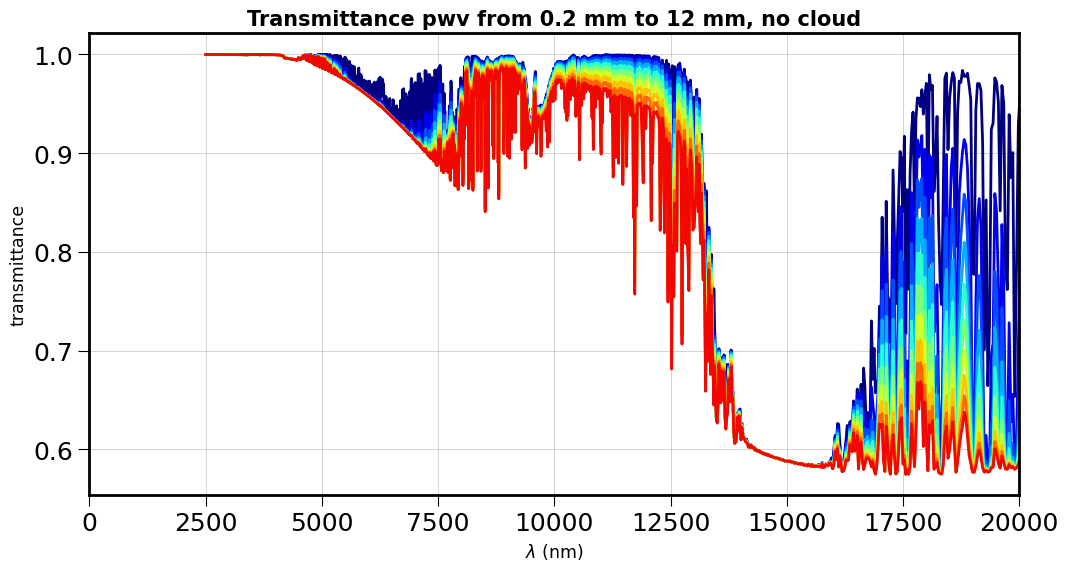

In [17]:
for index in np.arange(NBOBS):  
    if FLAG_TRANSMITTANCE:
        plt.plot(wl1,1-all_temp[index],'-',color=all_colors[index])
    else:
        plt.plot(wl1,all_temp[index],'-',color=all_colors[index])
plt.xlim(0,20000)
plt.grid()
if FLAG_BRIGHTNESS:
    plt.title("Brightness temperature pwv from 0.2 mm to 12 mm, no cloud")
    plt.xlabel("$\\lambda$ (nm)")
    plt.ylabel("Temperature (K)")
    figname=string_date+"_multibrightness_pwv_cld0.png"
if FLAG_TRANSMITTANCE:
    plt.title("Transmittance pwv from 0.2 mm to 12 mm, no cloud")
    plt.xlabel("$\\lambda$ (nm)")
    plt.ylabel("transmittance")
    figname=string_date+"_multittransmittance_pwv_cld0.png"    
else:
    plt.title("Irradiance pwv from 0.2 mm to 12 mm, no cloud")
    plt.xlabel("$\\lambda$ (nm)")
    plt.ylabel("irradiance ($W/(m^2.nm)$)")
    figname=string_date+"_multiirradiance_pwv_cld0.png"
plt.savefig(figname)